In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

## Initialize all variables

In [13]:
from utils.dataset_metadata import DatasetMetadata
from dataset_analysis_scripts.count_files import count_sizes_in_my_dataset
from dataset_analysis_scripts.dataset_counter import DatasetCounter
from static_variables.dataset_variables import CholecInstanceSegVariables
INSTRUMENT_ID_TO_INSTRUMENT_CLASS_DICT = CholecInstanceSegVariables.instrument_id_to_instrument_class_dict

In [14]:
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/final_cholecinstanceseg'
dataset_name = 'cholecinstanceseg'
dataset_style = "dataset_split"
class_names = list(INSTRUMENT_ID_TO_INSTRUMENT_CLASS_DICT.values())

In [6]:
dataset = DatasetMetadata(path_to_dataset=path_to_dataset,
                        dataset_name=dataset_name,
                        dataset_folder_style=dataset_style)
                

all sequences can be found


In [7]:
dataset_metadata = dataset.get_dataset_metadata()

In [15]:
counter_for_cholec_instance_seg =  DatasetCounter(
    path_to_dataset=path_to_dataset,
    dataset_name = dataset_name,
    dataset_style=dataset_style,    
    class_names = class_names,
    )

all sequences can be found


## Count my dataset size

In [16]:
from dataset_analysis_scripts.count_files import count_sizes_in_my_dataset
total_count = count_sizes_in_my_dataset(dataset_metadata)
print(f"Total count images in the dataset: {total_count}")

Entering base data structure
   Entering sub-dictionary key 'test'
      size of seq 'VID07_t80_sparse': 152
      size of seq 'VID09_seg8k': 240
      size of seq 'VID14_t50_full': 1709
      size of seq 'VID15_t50_full': 2059
      size of seq 'VID16_t80_sparse': 99
      size of seq 'VID20_seg8k': 160
      size of seq 'VID21_t80_sparse': 59
      size of seq 'VID22_t50_full': 1533
      size of seq 'VID24_seg8k': 960
      size of seq 'VID29_t50_full': 2351
      size of seq 'VID33_t80_sparse': 59
      size of seq 'VID38_t80_sparse': 103
      size of seq 'VID41_t80_sparse': 104
      size of seq 'VID45_t80_sparse': 113
      size of seq 'VID53_t80_sparse': 110
      size of seq 'VID55_seg8k': 240
      size of seq 'VID58_t80_sparse': 200
      size of seq 'VID61_t80_sparse': 147
      size of seq 'VID64_t80_sparse': 80
      size of seq 'VID69_t80_sparse': 153
      size of seq 'VID72_t80_sparse': 104
      size of seq 'VID77_t80_sparse': 84
   Total count in sub-dictionary at ke

## Get class frequency

In [17]:
dataset_class_frequency = counter_for_cholec_instance_seg.count_class_frequency(aggregation_level='dataset')

In [18]:
dataset_class_frequency

{'grasper': 38144,
 'hook': 19282,
 'irrigator': 2420,
 'clipper': 1324,
 'bipolar': 2558,
 'scissors': 712,
 'snare': 43}

In [19]:
sum(dataset_class_frequency.values())

64483

## plotting class frequency in dataset plot

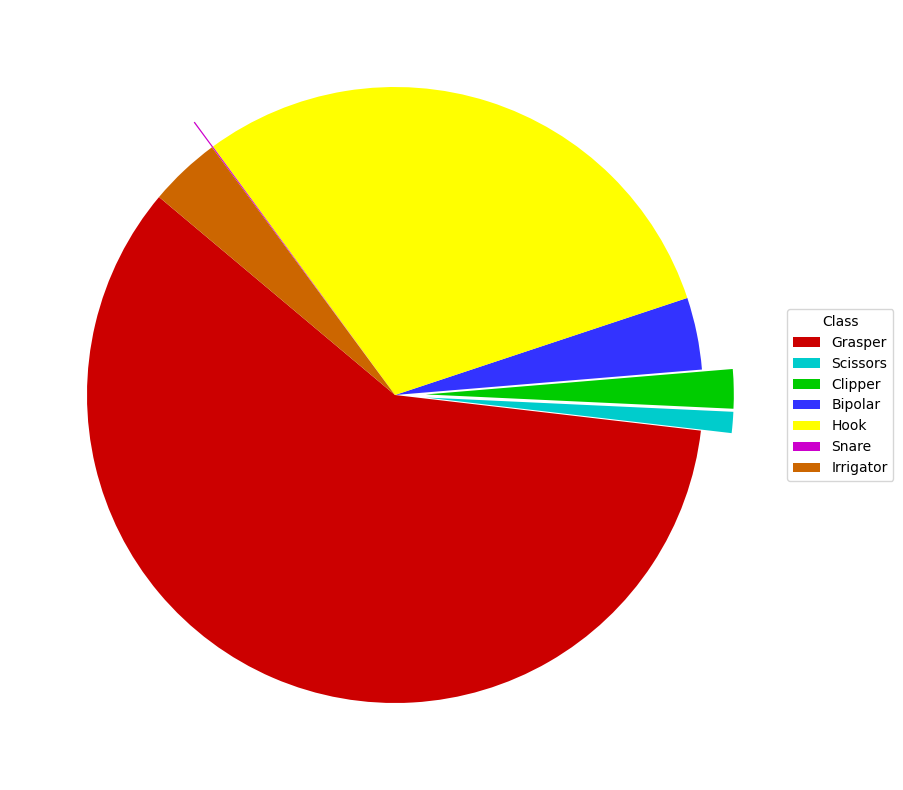

In [21]:
import matplotlib.pyplot as plt

# Data for the instruments
instrument_data = {
    'Grasper': 38144,
    'Scissors': 712,
    'Clipper': 1324,
    'Bipolar': 2437,
    'Hook': 19282,
    'Snare': 43,
    'Irrigator': 2420,
}

# Extracting labels and values
labels = list(instrument_data.keys())
sizes = list(instrument_data.values())

# Specifying colors for each slice
colors = ['#CC0000', '#00CCCC', '#00CC00','#3333FF', '#FFFF00','#CC00CC', '#CC6600']

explode = [0.1 if size < 2000 else 0 for size in sizes]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(sizes,  colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

for i, wedge in enumerate(wedges):
        wedge.set_linewidth(0)  # Example of setting thicker line for specific slices


plt.legend(wedges, labels, title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to minimize space around the pie chart
plt.tight_layout()

# Displaying the chart
plt.show()

## Ploting instance spread informaiton

In [22]:
dataset_sequence_instance_frequency = counter_for_cholec_instance_seg.count_instance_frequency(aggregation_level='image')

In [23]:
frequency = {}
for count in dataset_sequence_instance_frequency.values():
    frequency[count] = frequency.get(count, 0) + 1

In [24]:
frequency

{0: 4914, 1: 14885, 2: 16805, 3: 5328, 4: 1}

In [25]:
sum(frequency.values())

41933

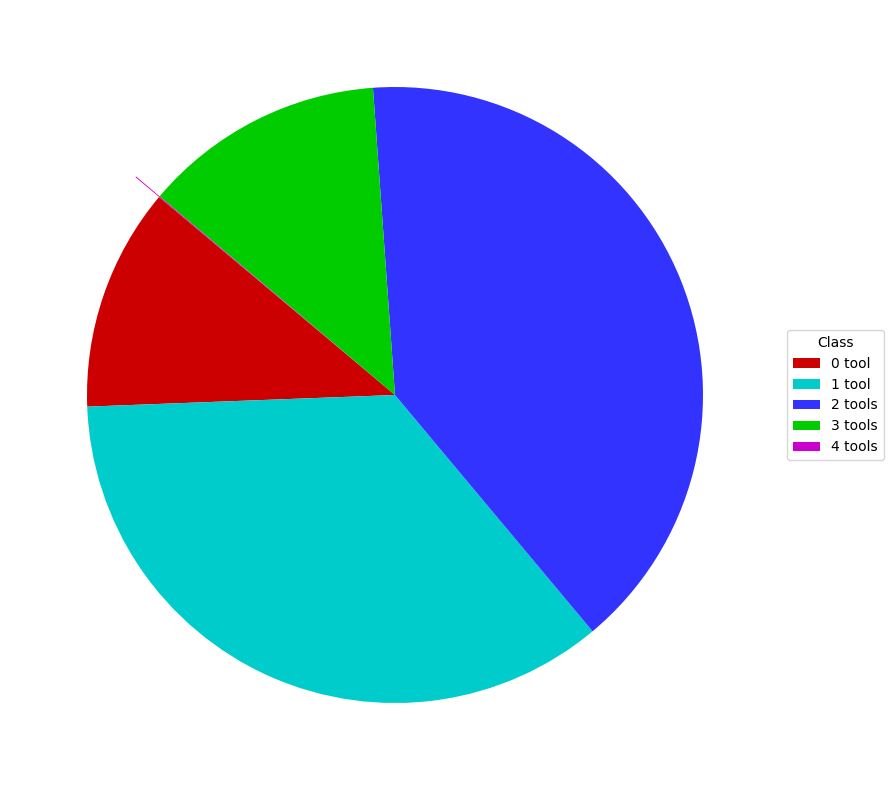

In [27]:
import matplotlib.pyplot as plt

# Data for the instruments
instrument_data = {
    '0 tool': 4914,
    '1 tool': 14885,
    '2 tools': 16805,
    '3 tools': 5328,
    '4 tools': 20,
}

# Extracting labels and values
labels = list(instrument_data.keys())
sizes = list(instrument_data.values())

# Specifying colors for each slice
colors = ['#CC0000', '#00CCCC', '#3333FF', '#00CC00', '#CC00CC']
# '#CC00CC', '#CC6600'

explode = [0.1 if size < 2000 else 0 for size in sizes]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(sizes,  colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

for i, wedge in enumerate(wedges):
        wedge.set_linewidth(0)  # Example of setting thicker line for specific slices


plt.legend(wedges, labels, title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to minimize space around the pie chart
plt.tight_layout()

# Displaying the chart
plt.show()


## Plot ratio of each of the instruments in a sequence.  

In [30]:
dataset_sequence_class_frequency = counter_for_cholec_instance_seg.count_class_frequency(aggregation_level='sequence')

In [33]:
dataset_partition_sequence_class_frequency =  {
    'seg8k' : {},
    't50_full': {},
    't50_sparse': {},
    't80_sparse': {}
}

for seq in dataset_sequence_class_frequency.keys():
    if seq[-5:] == 'seg8k':
        dataset_partition_sequence_class_frequency['seg8k'][seq] = dataset_sequence_class_frequency[seq]
        
    elif seq[-8:] == 't50_full': 
        dataset_partition_sequence_class_frequency['t50_full'][seq] = dataset_sequence_class_frequency[seq]
        
    elif seq[-10:] == 't50_sparse':
        dataset_partition_sequence_class_frequency['t50_sparse'][seq] = dataset_sequence_class_frequency[seq] 
    
    elif seq[-10:] == 't80_sparse':
        dataset_partition_sequence_class_frequency['t80_sparse'][seq] = dataset_sequence_class_frequency[seq]      
           
    

In [34]:
dataset_partition_sequence_class_frequency

{'seg8k': {'VID09_seg8k': {'grasper': 0,
   'hook': 0,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID20_seg8k': {'grasper': 160,
   'hook': 161,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID24_seg8k': {'grasper': 690,
   'hook': 0,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID55_seg8k': {'grasper': 460,
   'hook': 221,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID01_seg8k': {'grasper': 1169,
   'hook': 809,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID12_seg8k': {'grasper': 1058,
   'hook': 447,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID18_seg8k': {'grasper': 160,
   'hook': 161,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID25_seg8k': {'grasper': 552,
  

In [36]:
dataset_partition_sequence_class_frequency['t80_sparse']

{'VID07_t80_sparse': {'grasper': 162,
  'hook': 98,
  'irrigator': 6,
  'clipper': 6,
  'bipolar': 9,
  'scissors': 1,
  'snare': 0},
 'VID16_t80_sparse': {'grasper': 87,
  'hook': 63,
  'irrigator': 5,
  'clipper': 2,
  'bipolar': 2,
  'scissors': 2,
  'snare': 0},
 'VID21_t80_sparse': {'grasper': 43,
  'hook': 27,
  'irrigator': 0,
  'clipper': 4,
  'bipolar': 0,
  'scissors': 1,
  'snare': 0},
 'VID33_t80_sparse': {'grasper': 49,
  'hook': 21,
  'irrigator': 8,
  'clipper': 3,
  'bipolar': 2,
  'scissors': 1,
  'snare': 0},
 'VID38_t80_sparse': {'grasper': 85,
  'hook': 69,
  'irrigator': 8,
  'clipper': 3,
  'bipolar': 4,
  'scissors': 1,
  'snare': 0},
 'VID41_t80_sparse': {'grasper': 86,
  'hook': 63,
  'irrigator': 22,
  'clipper': 2,
  'bipolar': 2,
  'scissors': 1,
  'snare': 0},
 'VID45_t80_sparse': {'grasper': 53,
  'hook': 65,
  'irrigator': 12,
  'clipper': 2,
  'bipolar': 8,
  'scissors': 1,
  'snare': 0},
 'VID53_t80_sparse': {'grasper': 66,
  'hook': 64,
  'irrigator': 